## Intro

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import pickle
import os

In [2]:
# note: need to switch to using conv_added instead of conv_cumsum for lcp
# not: additionally need to change all 30s to 20s for lcp5 (since it hasn't finished yet)

# save_dir = '2023-08-01T17:43:58_plain'
# save_dir = '2023-08-01T17:44:08_proj'
# save_dir = '2023-10-03T22:43:47_lcp5.0'
# save_dir = '2023-10-03T23:20:25_lcp10.0'
# save_dir = '2023-10-03T23:27:45_lcp10.0sample'
save_dir = '2023-10-03T23:30:10_lcp20.0' 
task_total = 30
added = True

In [3]:
save_name = save_dir.split('_')[1]
# Get convergence numbers
conv_f = os.path.join('..', 'data', save_dir, 'conv.txt')
conv = np.loadtxt(conv_f)

NameError: name 'save_dir' is not defined

In [157]:
perfs_f = os.path.join('..', 'data', save_dir, 'perfs', f'{task_total}.pkl')

with open(perfs_f,'rb') as fp:
    perfs = pickle.load(fp)

## Number of trias per task to convergence

In [158]:
conv_cumsum = np.cumsum(conv)
if added:
    addition = np.arange(50, 50*(len(conv)+1), 50)
    conv_cumsum = conv_cumsum + addition

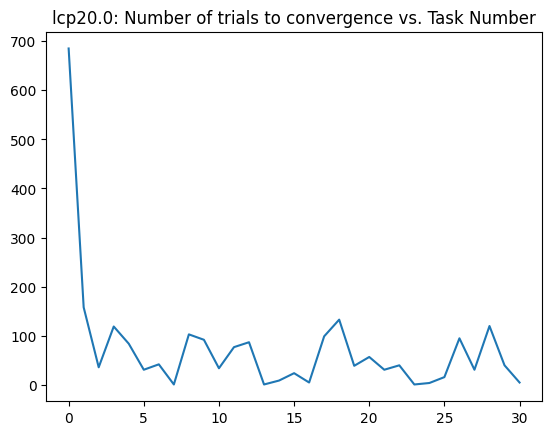

In [159]:
plt.figure(facecolor='white')
plt.plot(conv)
plt.title(f"{save_name}: Number of trials to convergence vs. Task Number")
plt.savefig(os.path.join('..', 'results', '2023-10-04_auto', f"{save_name}_trialstoconv.png"))
plt.show()

## Running average of performance over time

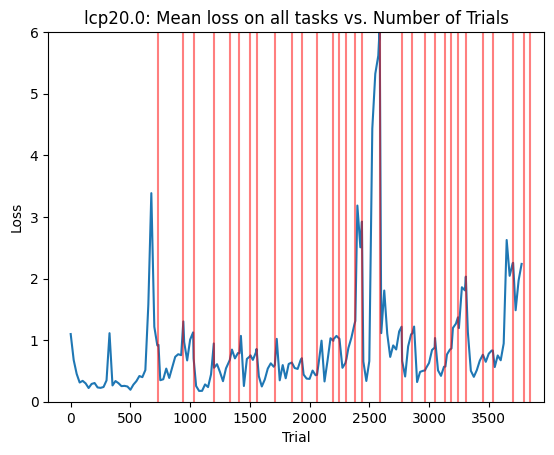

In [160]:
plt.figure(facecolor='white')
plt.plot(
    perfs['trials'],
    # mean over all tasks
    np.mean(np.array([np.mean(np.array(perfs[k]),axis=1) for k in range(task_total)]),axis=0),
    label='plain'
)
# for index in conv_cumsum:
for index in conv_cumsum:
    plt.axvline(x=index, color='r', alpha=0.5)
plt.ylim(0, 6)
plt.xlabel("Trial")
plt.ylabel("Loss")
plt.title(f"{save_name}: Mean loss on all tasks vs. Number of Trials")
plt.savefig(os.path.join('..', 'results', '2023-10-04_auto', f"{save_name}_loss-all.png"))
plt.show()

[6.25520805e-03 1.12064509e-03 4.07874696e-02 8.11114073e-01
 3.55203927e-01 4.58457083e-01 3.63793463e-01 3.67678612e-01
 1.64192244e-01 5.49885690e-01 1.62112460e-01 4.53334063e-01
 1.13204515e+00 1.13935614e+00 6.31675184e-01 1.13500321e+00
 2.27145720e+00 5.17928123e+00 1.24438298e+00 8.50061536e-01
 5.16303360e-01 8.28367651e-01 5.34191489e-01 7.67755508e-01
 1.54910123e+00 2.15700436e+00 7.90875018e-01 8.45314920e-01
 2.32020283e+00]


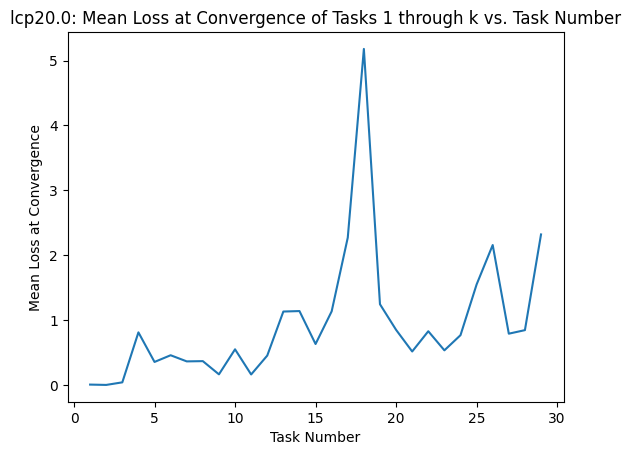

In [161]:
means = np.empty((task_total-1,))
for k in range(task_total-1):
    kth_conv_trial = conv_cumsum[k] 
    kth_conv_trial_idx = perfs['trials'].index(kth_conv_trial)

    perf_taskbytrial = np.array([np.mean(np.array(perfs[i]),axis=1) for i in range(k+1)])
    # take the mean of the performance on each of the k tasks at the kth convergence trial
    means[k] = np.mean(perf_taskbytrial[:,kth_conv_trial_idx])
print(means)

plt.figure(facecolor='white')
plt.plot(range(1, task_total), means)
plt.xlabel("Task Number")
plt.ylabel("Mean Loss at Convergence")
plt.title(f"{save_name}: Mean Loss at Convergence of Tasks 1 through k vs. Task Number")
plt.savefig(os.path.join('..', 'results', '2023-10-04_auto', f"{save_name}_loss-running.png"))
plt.show()